In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Loading Dataset from the given Data
df = pd.read_csv("Dataset.csv")

# checking whether the dataset is imported correctly or not
df.head()


,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [10]:
# dropping some cols we don't really need
df_clean = df.drop([
    "Restaurant ID", "Restaurant Name", "Address", 
    "Locality", "Locality Verbose", "Currency", 
    "Rating color", "Rating text"
], axis=1)

# quick way: drop rows with missing data (might revisit later if too many are lost)
df_clean = df_clean.dropna()

# binary conversion: yes/no -> 1/0
yn_cols = ["Has Table booking", "Has Online delivery", 
           "Is delivering now", "Switch to order menu"]

for c in yn_cols:
    # map handles it cleaner + no future warnings
    df_clean[c] = df_clean[c].map({"Yes": 1, "No": 0}).astype(int)

# one-hot encode a couple of categoricals
df_clean = pd.get_dummies(
    df_clean, 
    columns=["City", "Cuisines", "Country Code"], 
    drop_first=True
)

df_clean.head()


,Longitude,Latitude,Average Cost for two,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Votes,...,Country Code_148,Country Code_162,Country Code_166,Country Code_184,Country Code_189,Country Code_191,Country Code_208,Country Code_214,Country Code_215,Country Code_216
0,121.027535,14.565443,1100,1,0,0,0,3,4.8,314,...,False,True,False,False,False,False,False,False,False,False
1,121.014101,14.553708,1200,1,0,0,0,3,4.5,591,...,False,True,False,False,False,False,False,False,False,False
2,121.056831,14.581404,4000,1,0,0,0,4,4.4,270,...,False,True,False,False,False,False,False,False,False,False
3,121.056475,14.585318,1500,0,0,0,0,4,4.9,365,...,False,True,False,False,False,False,False,False,False,False
4,121.057508,14.584450,1500,1,0,0,0,4,4.8,229,...,False,True,False,False,False,False,False,False,False,False


In [11]:
# set target variable
y = df_clean["Aggregate rating"]

# use everything else as features, drop target from X
X = df_clean.drop("Aggregate rating", axis=1)

# splitting data into train and test sets (80/20 split)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# quick check to see the shapes
print(f"Train shape: {X_train.shape}, Test shape: {X_test.shape}")


Train shape: (7633, 1986), Test shape: (1909, 1986)


In [12]:
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
# Feature Importances
importances = rf.feature_importances_
features = X.columns

feat_importances = pd.DataFrame({"Feature": features, "Importance": importances})
feat_importances = feat_importances.sort_values(by="Importance", ascending=False)

# Show top 15 features
feat_importances.head(15)


,Feature,Importance
8,Votes,0.945411
0,Longitude,0.016340
1,Latitude,0.010810
2,Average Cost for two,0.004758
4,Has Online delivery,0.000845
1476,"Cuisines_North Indian, Chinese",0.000789
7,Price range,0.000624
1973,Country Code_30,0.000582
1773,"Cuisines_Pizza, Fast Food",0.000545
1667,"Cuisines_North Indian, Mughlai, Chinese",0.000544


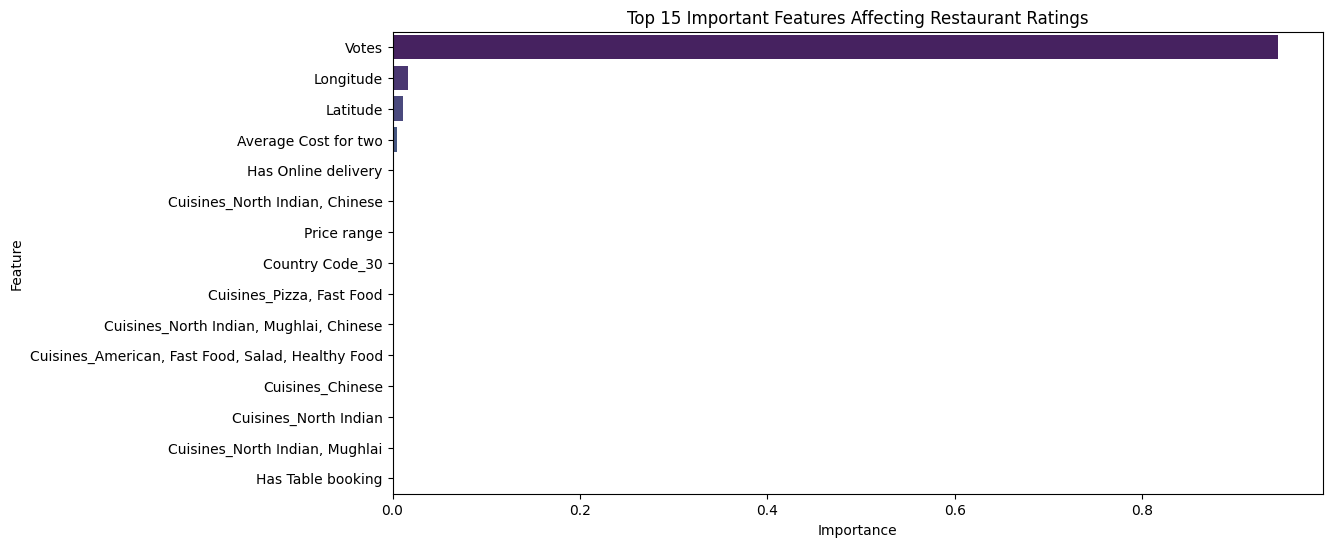

In [13]:
plt.figure(figsize=(12,6))
sns.barplot(x="Importance", y="Feature", data=feat_importances.head(15), hue="Feature", dodge=False, palette="viridis", legend=False)
plt.title("Top 15 Important Features Affecting Restaurant Ratings")
plt.savefig("feature_importance.png")
plt.show()


In [14]:
# simple linear regression model — train it on our training data
lr = LinearRegression()
lr.fit(X_train, y_train)

# predict ratings on the test set
y_pred_lr = lr.predict(X_test)

# now let's try a random forest — usually works better with lots of features
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# predictions from the random forest model
y_pred_rf = rf.predict(X_test)


In [15]:
# checking how our linear regression did
print("Linear Regression performance:")
print(" - R squared:", r2_score(y_test, y_pred_lr))
print(" - RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_lr)))

# now let's see how the random forest did
print("\nRandom Forest performance:")
print(" - R squared:", r2_score(y_test, y_pred_rf))
print(" - RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_rf)))


Linear Regression performance:
 - R squared: 0.1685918312160405
 - RMSE: 1.379837482751319

Random Forest performance:
 - R squared: 0.9601672305166756
 - RMSE: 0.30202371558765106


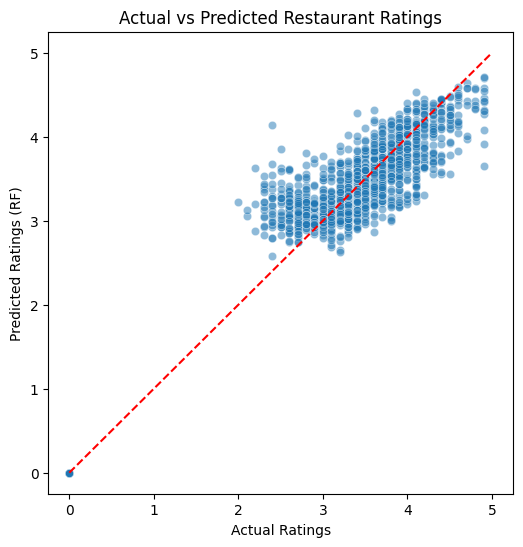

In [16]:
# Quick scatter plot to see how well the random forest is predicting ratings
plt.figure(figsize=(6,6))
sns.scatterplot(x=y_test, y=y_pred_rf, alpha=0.5)
plt.plot([0,5],[0,5], color='red', linestyle='--')  # diagonal reference line
plt.xlabel("Actual Ratings")
plt.ylabel("Predicted Ratings (RF)")
plt.title("Actual vs Predicted Restaurant Ratings")
plt.savefig("scatter.png")
plt.show()

# Looks like most points cluster around the diagonal — not bad!
